In [1]:
import portfolio_utils as pu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

from tqdm import tqdm

In [2]:
#Select Rebalance Dates
rebalance_dates = [
    "2021-01-01","2021-02-01","2021-03-01",
    "2021-04-01","2021-05-01","2021-06-01",
    "2021-07-01","2021-08-01","2021-09-01",
    "2021-10-01","2021-11-01","2021-12-01",]
#Portfolio Start and Stop Dates
start="2021-02-20" 
endp1="2021-08-26"




# some nice code curtesy of Kevin
agg_data = list()
data_path = "data/crypto_USDT.csv"
crypto_ = pd.read_csv(data_path, index_col="tradeDate")
#crypto_ = crypto[["tradeDate", "symbol", "avg_latest"]]
#crypto_ = crypto_.pivot_table(index="tradeDate", columns="symbol", values = "avg_latest")
crypto2_ = crypto_.pct_change()
crypto2_ = crypto2_[3:]


In [3]:
#list(crypto_.columns)

In [4]:
sim_sum=100000
initial_investment = 10000
symbols = [
    "BTCUSDT", 
    "ETHUSDT", 
    "ADAUSDT", 
    "BNBUSDT", 
    "SOLUSDT", 
    "DOTUSDT", 
    "UNIUSDT", 
    "LTCUSDT",
    "LINKUSDT",
    "MATICUSDT",
    "FILUSDT",
    "AVAXUSDT",
    "VETUSDT",
    "XLMUSDT",
    "TRXUSDT",
    "EOSUSDT",
    "XMRUSDT",
    "ATOMUSDT",
    "AAVEUSDT",
    #"CAKEUSDT",
    #"MIOTAUSDT",
    #"GRTUSDT",
]
potfolio_SR = np.zeros(sim_sum)
a = np.zeros(((sim_sum,len(symbols))))
portfolio_df = pd.DataFrame(a)
portfolio_df.columns = symbols
portfolio_df["Portfolio_SR"] = -999

for i in tqdm(range(sim_sum)):
    symbol_count = random.randint(2,len(symbols))
    symbol_sublist = random.sample(symbols, symbol_count)
    portfolio_weights = np.random.dirichlet(np.ones(symbol_count))

    df = crypto2_[symbol_sublist]
    clean_return_history = df.reset_index(drop=True)
    clean_return_history['date']=pu.date_cleaner(crypto2_.index)
    
    # Instantiate the portfolio object
    portfolio_obj = pu.Portfolio(
        data=clean_return_history, 
        symbols=symbol_sublist, 
        weights=portfolio_weights, 
        initial_investment=initial_investment,
        start_date=start,
        end_date=endp1, 
        rebalance_dates=rebalance_dates)
    # estimate returns
    portfolio_obj.estimate_portfolio_returns()
    #print(portfolio_obj.get_sharpe_report())
    portfolio_df.loc[i,symbol_sublist] = portfolio_weights
    portfolio_df.loc[i,"Portfolio_SR"] = portfolio_obj.get_sharpe_ratio()
portfolio_df.to_csv("data/random_portfolios.csv", index=False)

100%|██████████| 100000/100000 [2:23:51<00:00, 11.59it/s]  


Text(0.5, 1.0, 'Random Portfolios')

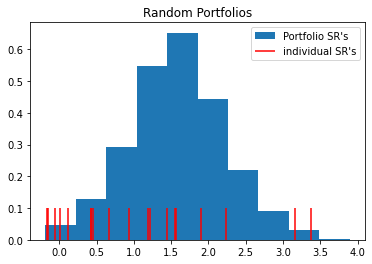

In [5]:
#clean_return_history
ind_SR = np.sqrt(365)*np.mean(crypto2_, axis=0)/np.std(crypto2_, axis=0)
_=plt.hist(portfolio_df["Portfolio_SR"], label="Portfolio SR's", density=True)
plt.vlines(x=ind_SR[symbols],ymin=0, ymax=.1, color="red", label="individual SR's")
_=plt.legend()
plt.title("Random Portfolios")

In [9]:
portfolio_df.loc[portfolio_df.Portfolio_SR>max(ind_SR[symbols]),:]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,SOLUSDT,DOTUSDT,UNIUSDT,LTCUSDT,LINKUSDT,MATICUSDT,FILUSDT,AVAXUSDT,VETUSDT,XLMUSDT,TRXUSDT,EOSUSDT,XMRUSDT,ATOMUSDT,AAVEUSDT,Portfolio_SR
523,0.000000,0.0,0.167150,0.000000,0.832850,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.485431
615,0.000000,0.0,0.152840,0.000000,0.847160,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.477409
1082,0.051363,0.0,0.000000,0.000000,0.559621,0.0,0.000000,0.0,0.000000,0.389016,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.784906
1339,0.000000,0.0,0.000000,0.000000,0.635907,0.0,0.000000,0.0,0.000000,0.000000,0.364093,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.445942
1621,0.000000,0.0,0.000000,0.000000,0.507461,0.0,0.000000,0.0,0.000000,0.411779,0.080760,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.889721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97775,0.000000,0.0,0.000000,0.000000,0.749657,0.0,0.000000,0.0,0.000000,0.000000,0.250343,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.528201
98663,0.037149,0.0,0.000000,0.000000,0.598790,0.0,0.000000,0.0,0.000000,0.156561,0.000000,0.0,0.021439,0.0,0.0,0.186061,0.0,0.000000,0.0,3.440174
99558,0.000000,0.0,0.336877,0.000000,0.412689,0.0,0.000000,0.0,0.116037,0.134396,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.455501
99560,0.000000,0.0,0.000000,0.000000,0.358175,0.0,0.000000,0.0,0.000000,0.605092,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.036732,0.0,3.630362
